In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# models
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [7]:
df = pd.read_excel("/Users/yashmi/Desktop/Capstone_project_datasets/cardio_train.xlsx")

In [46]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.338686,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.765294,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [48]:
from matplotlib import rcParams

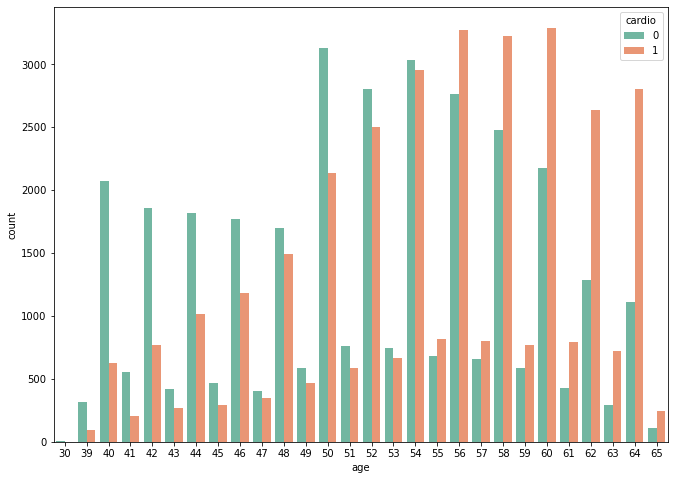

In [49]:
rcParams['figure.figsize'] = 11, 8
sns.countplot(x='age', hue='cardio', data = df, palette="Set2");

In [50]:
# Cleaning Data

In [51]:
df.isnull().values.any()

False

In [52]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.338686,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.765294,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
# As observed minimum age is 30 and minimum height and weight is 55 and 10 which is incorrect. To get rid of outliers we will remove 2.5% data from top and bottom

In [54]:
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)

In [55]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,63866.000000,63866.000000,63866.000000,63866.000000,63866.000000,63866.000000,63866.000000,63866.000000,63866.000000,63866.000000,63866.000000,63866.000000,63866.000000
mean,49896.567454,53.349450,1.347806,164.497855,73.543564,128.815442,95.953308,1.359049,1.222654,0.086353,0.052876,0.803683,0.498199
std,28837.399734,6.750712,0.476278,6.862322,11.720806,160.987785,186.287388,0.674782,0.568902,0.280886,0.223788,0.397214,0.500001
min,0.000000,30.000000,1.000000,150.000000,52.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24925.250000,48.000000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,49883.500000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74743.750000,58.000000,2.000000,169.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,2.000000,180.000000,106.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
# Now the data looks quite balance

ap_hi pressure is higher than ap_lo one in 1082 cases


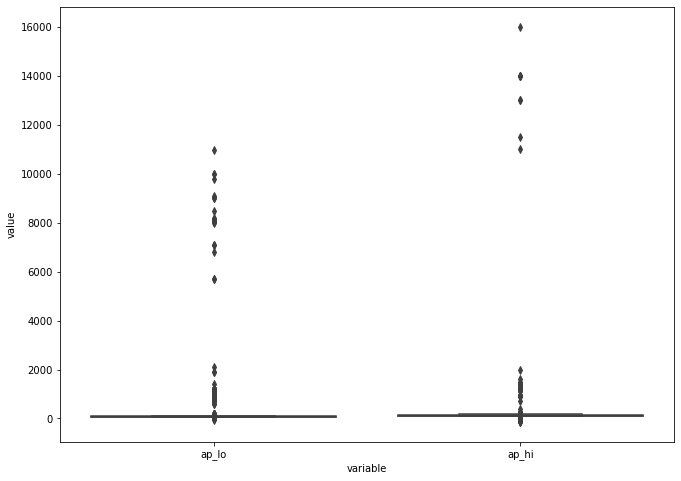

In [57]:
blood_pressure = df.loc[:,['ap_lo','ap_hi']]
sns.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())
print("ap_hi pressure is higher than ap_lo one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

In [58]:
# From the above boxplot we can see that ap_lo is high in some cases compared to ap_hi so this is incorrect.

In [59]:
# Here we are eliminating 2.5% from above and below in ap_lo and ap_hi

In [60]:
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)

ap_hi pressure is higher than ap_lo one in 0 cases


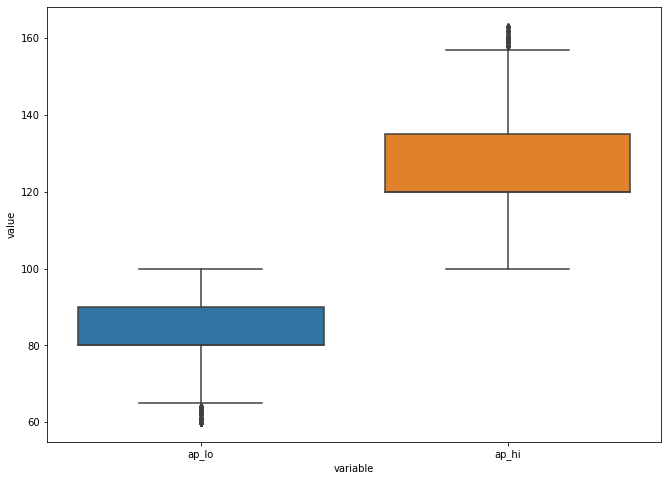

In [61]:
blood_pressure = df.loc[:,['ap_lo','ap_hi']]
sns.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())
print("ap_hi pressure is higher than ap_lo one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

In [62]:
#Correlation

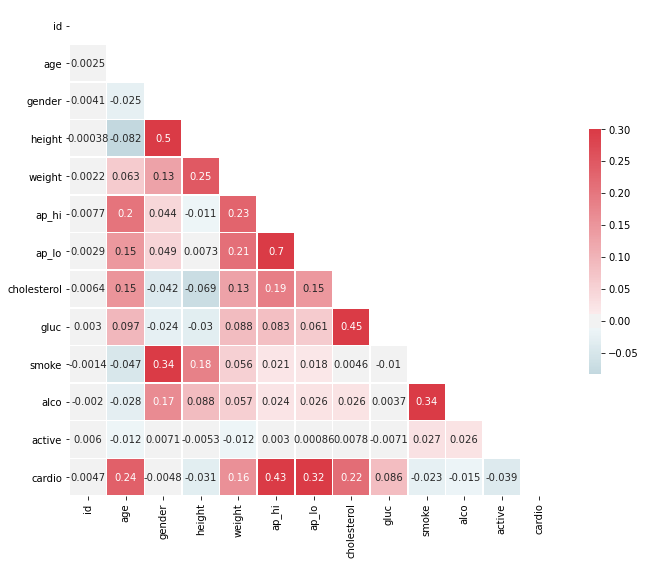

In [63]:
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [64]:
#Applying KNN model on the dataset

In [65]:
#Creating target and features variable

In [66]:
y = df['cardio'].values
X = df.drop('cardio', axis=1).values

In [67]:
y.shape

(60142,)

In [68]:
X.shape

(60142, 12)

In [69]:
# Splitting data into 70:30 ratio

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21, stratify = y)

In [71]:
knn = KNeighborsClassifier(n_neighbors = 6)

In [72]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [73]:
y_pred = knn.predict(X_test)

In [74]:
knn.score(X_test, y_test)

0.620462229119326

In [75]:
# Logitic Regression

In [76]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

69.34

In [77]:
acc_test_log = round(logreg.score(X_test, y_test) * 100, 2)
acc_test_log

70.44

In [82]:
# SVM

In [83]:
svc = SVC()
svc.fit(X_train, y_train)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

51.18

In [84]:
acc_test_svc = round(svc.score(X_test, y_test) * 100, 2)
acc_test_svc

51.18

In [87]:
# KNN

In [88]:
knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors': [2, 3]}, cv=10).fit(X_train, y_train)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print(acc_knn, knn.best_params_)

80.35 {'n_neighbors': 3}


In [89]:
acc_test_knn = round(knn.score(X_test, y_test) * 100, 2)
acc_test_knn

61.64

In [96]:
# Decision Tree

In [91]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

100.0

In [92]:
acc_test_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
acc_test_decision_tree

62.25

In [93]:
# Random Forest

In [94]:
random_forest = GridSearchCV(estimator=RandomForestClassifier(), param_grid={'n_estimators': [100, 300]}, cv=5).fit(X_train, y_train)
random_forest.fit(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(acc_random_forest,random_forest.best_params_)

100.0 {'n_estimators': 300}


In [95]:
acc_test_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
acc_test_random_forest

71.51